In [59]:
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pandas.plotting import table

In [60]:
data_fall19 = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\Stem Fair\fall19.csv', header=1)
data_fall18 = pd.read_csv(r'C:\Users\sushmita-khan\Desktop\Stem Fair\fall18.csv', header=1)

# data_fall18 = data_fall18.loc[data_fall18['Event_name'] == 'Eagle Expo Career Fair - Fall 2018']
# data_fall19 = data_fall19.loc[data_fall19['Event Name'] == 'Eagle Expo Career Fair - Fall 2019']

data_fall18.replace('Graduate EDS', 'Masters', inplace=True)
data_fall18.replace('Graduate Masters', 'Masters', inplace=True)   
data_fall18.replace('Engineering/Info Tech', 'Information Technology', inplace=True)
data_fall18.replace('Engineering/Mechanical Eng', 'Mechanical Engineering', inplace=True)
data_fall18.replace('Construction Engineering', 'Construction Management', inplace=True)
data_fall18.replace('Provost', 'VP Student Affairs', inplace=True)
data_fall18.replace('VP Academic Affairs', 'VP Student Affairs', inplace=True)

data_fall19.replace('Graduate EDS', 'Masters', inplace=True)
data_fall19.replace('Graduate Masters', 'Masters', inplace=True)   
data_fall19.replace('Construction Engineering','Construction Management', inplace=True)
data_fall19.replace('Information Technology/WebBSIT', 'Information Technology', inplace=True)
data_fall19.replace('Engineering/Mechatronics','Mechanical Engineering', inplace=True)
data_fall19.replace('VP Academic Affairs','VP Student Affairs', inplace=True)
data_fall19.replace('Business Administration,', 'Business', inplace=True)

data_fall19.rename(columns={'Class Level': "Classification"}, inplace=True)
data_fall18.rename(columns={'Class Level': "Classification"}, inplace=True)

f19_attend = data_fall19.shape
f18_attend = data_fall18.shape

print(f19_attend)
print(f18_attend)

(782, 16)
(746, 16)


In [61]:
data_fall19

,Event Name,Event Id,Event Date,Event Type,Hosted By,Location,Student First Name,Student Last Name,Email,Student Id,Check In Date,Check In Time,Grad Year,Classification,College,Major
0,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Md Shahjahan,Hossain,mh31604@georgiasouthern.edu,901230172,9/11/2019,12:41:25,12/30/2022,Masters,Engineering and Computing,Manufacturing Engineering
1,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Matthew,Carter,matthew_s_carter@georgiasouthern.edu,900985727,9/11/2019,13:58:45,12/30/2020,Masters,Engineering and Computing,Manufacturing Engineering
2,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Momena,Monwar,momena_monwar@georgiasouthern.edu,900981785,9/11/2019,12:56:40,5/30/2021,Masters,Engineering and Computing,Manufacturing Engineering
3,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Jada,Tyson,jada_a_tyson@georgiasouthern.edu,900932578,9/11/2019,11:25:48,12/30/2021,Junior,Engineering and Computing,Civil Engineering
4,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Marta,Edwards,marta_l_edwards@georgiasouthern.edu,900931600,9/11/2019,12:19:15,7/30/2021,Senior,Engineering and Computing,Civil Engineering
5,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Gabriele,De Figueiredo,gd04209@georgiasouthern.edu,901209926,9/11/2019,11:31:45,12/30/2024,Freshman,Engineering and Computing,Civil Engineering
6,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Kami,Johnson,kj05506@georgiasouthern.edu,900926195,9/11/2019,11:04:26,7/30/2021,Senior,Behavioral and Social Sciences,Criminal Justice & Criminology
7,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Reed,Curtis,rc15467@georgiasouthern.edu,901205283,9/11/2019,12:35:00,12/30/2024,Freshman,Engineering and Computing,Civil Engineering
8,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,Garrett,Dean,gd01558@georgiasouthern.edu,901006456,9/11/2019,13:14:53,12/30/2023,Sophomore,Engineering and Computing,Civil Engineering
9,STEM Career Fair - Fall 2019,19428,9/11/2019 11:00,Career Fair,OCPD,Statesboro Campus - Recreation Activity Center,John,Williams-Rosario,john_williams@georgiasouthern.edu,900949540,9/11/2019,12:37:17,12/30/2020,Senior,Engineering and Computing,Civil Engineering


In [62]:
new_index= ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters','Doctoral']

major_f18 = (data_fall18.groupby(['Classification']).size())
major_f19 = (data_fall19.groupby(['Classification']).size())

# display(major_f18.to_frame())
# display(major_f19.to_frame())
            
major_f18 = major_f18.to_frame().astype(int)
major_f18 = major_f18.reindex(new_index)

major_f19 = major_f19.to_frame()
major_f19 = major_f19.reindex(new_index)

major_f18.fillna(0, inplace=True)
major_f19.fillna(0, inplace=True)

major_f18 = major_f18.astype(int)
major_f19 = major_f19.astype(int)

display(major_f18)
display(major_f19)

,0
Classification,
Freshman,14
Sophomore,46
Junior,90
Senior,550
Masters,45
Doctoral,1


,0
Classification,
Freshman,63
Sophomore,100
Junior,162
Senior,433
Masters,23
Doctoral,0


,Fall 2019,Fall 2018
Classification,,
Freshman,59,21
Sophomore,61,96
Junior,76,53
Senior,202,232
Masters,14,7
Doctoral,0,2


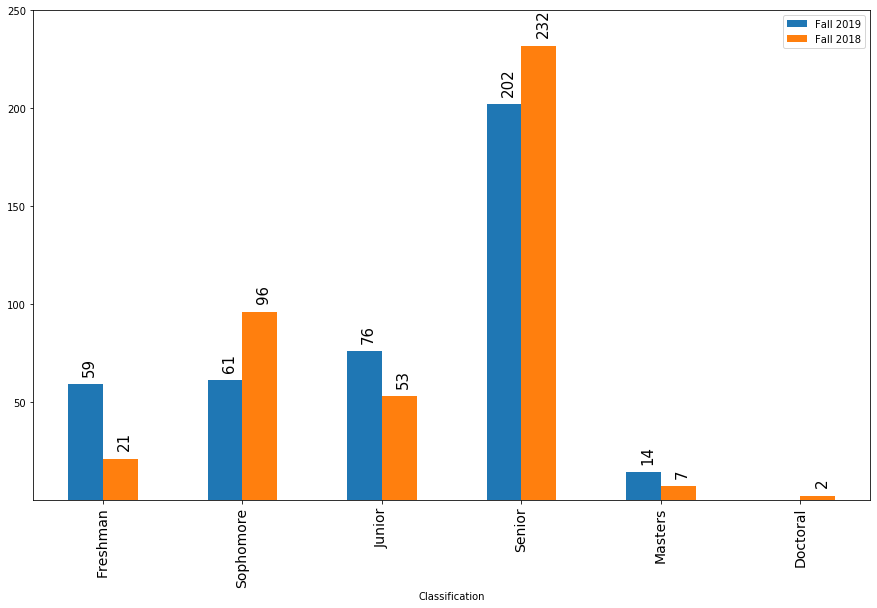

In [39]:
comp = major_f19.merge(major_f18, how='outer', on='Classification')
comp.rename(columns={'0_x': 'Fall 2019', '0_y': 'Fall 2018'}, inplace=True)

# comp.drop('Doctoral', inplace=True)
display(comp)

comp_ = comp.plot.bar(figsize=(15,9))

comp_.set_alpha(4.00)
comp_.set_yticks([50,100,150,200,250])
comp_.set_xticklabels(['Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters','Doctoral'], fontsize=14)

totals = []

# find the values and append to list
for i in comp_.patches:
    totals.append(i.get_width())

# set individual bar lables using above list

total = sum(totals)

# set individual bar lables using above list
for i in comp_.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_height()>0:
        comp_.text(i.get_x()+0.1, i.get_height()+5.7, \
                str(i.get_height()), fontsize=15, color='black',rotation=90)

['Manufacturing Engineering' 'Civil Engineering' 'Finance'
 'Graphic Design' 'Performance' 'Mathematics'
 'Info Sys/Entrprs Res Plan Sys' 'Management' 'Public Health' 'Biology'
 'Information Systems' 'Recreation' 'Computer Engineering'
 'Computer Science' 'Chemistry' 'Criminal Justice & Criminology'
 'Interior Design' 'Construction Management' 'Nursing' 'Political Science'
 'Exercise Science' 'Applied Physical Sciences' 'Writing and Linguistics'
 'Biochemistry' 'Logis/Intermodal Transport' 'Electrical Engineering'
 'Journalism' 'Economics' 'Business' 'Engineering'
 'Information Technology' 'Mechanical Engineering' 'Art'
 'Interdisciplinary Studies' 'Supply Chain Management' 'Psychology'
 'Accounting' 'Geology' 'Marketing' 'Radiologic Science'
 'Non-Degree Seeking' 'Mgt/Entrepreneurship-Small Bus' 'Social Science']


,Fall 2019,Fall 2018
Major,,
Civil Engineering,82,74
Computer Engineering,8,1
Computer Science,43,46
Construction Management,154,140
Electrical Engineering,66,88
Information Technology,84,115
Manufacturing Engineering,33,9
Mechanical Engineering,167,175


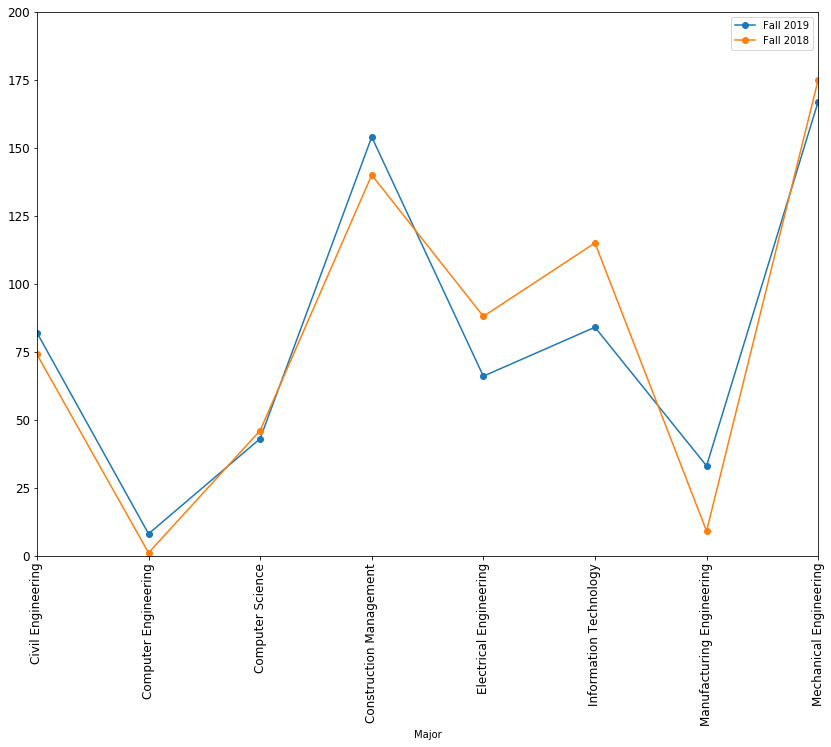

In [63]:
new_index= ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Masters', 'Doctoral']

vals_f19 = ['Information Technology', 'Civil Engineering', 'Construction Management',
            'Manufacturing Engineering', 'Computer Science', 'Electrical Engineering', 'Computer Engineering',
            'Civil Engineering/Constructi', 'Mechanical Engineering', 'Engineering/Mechatronics']

vals_f18 = ['Electrical Engineering','Mechanical Engineering', 'Construction Management','Information Technology' ,
            'Manufacturing Engineering','Civil Engineering', 'Computer Science', 'Civil Engineering/Constructi', 
            'Engineering/Info Tech', 'Computer Engineering' ]

majors_f18 = data_fall18['Major'].unique()
majors_f19 = data_fall19['Major'].unique()

print(majors_f18)

maj_f19 = data_fall19.loc[data_fall19['Major'].isin(vals_f19)]
maj_f19 = maj_f19.groupby(['Major']).size()
# maj_f19 = maj_f19.sort_values(ascending=True)

maj_f18 = data_fall18.loc[data_fall18['Major'].isin(vals_f18)]
maj_f18 = maj_f18.groupby(['Major']).size()
# maj_f18 = maj_f18.sort_values(ascending=True)


maj_f19 = maj_f19.to_frame()
maj_f18 = maj_f18.to_frame()
# display(maj_f19)

major_comp = maj_f19.merge(maj_f18, how='outer', on='Major')
major_comp.fillna(0, inplace=True)

major_comp.rename(columns={'0_x':'Fall 2019', '0_y': 'Fall 2018'}, inplace=True)
display(major_comp)

# major_comp.plot(subplots=(1,1),  figsize=(10, 8), marker='o')

fig, ax = plt.subplots(1, 1)
# table(ax, np.round(major_comp.describe(), 2),loc='upper left', colWidths=[0.25, 0.25, 0.25])

major_comp.plot(ax=ax, ylim=(0, 200), legend=True,figsize=(14, 10), marker='o', fontsize=12, rot=90)

,0
College,
College of Behavioral and Social Sciencess,34
College of Education,4
College of Engineering and Computing,332
College of Science and Mathematics,24
Jiann-Ping Hsu College of Public Health,2
Parker College of Business,13
VP Student Affairs,1
Waters College of Health Professionss,2


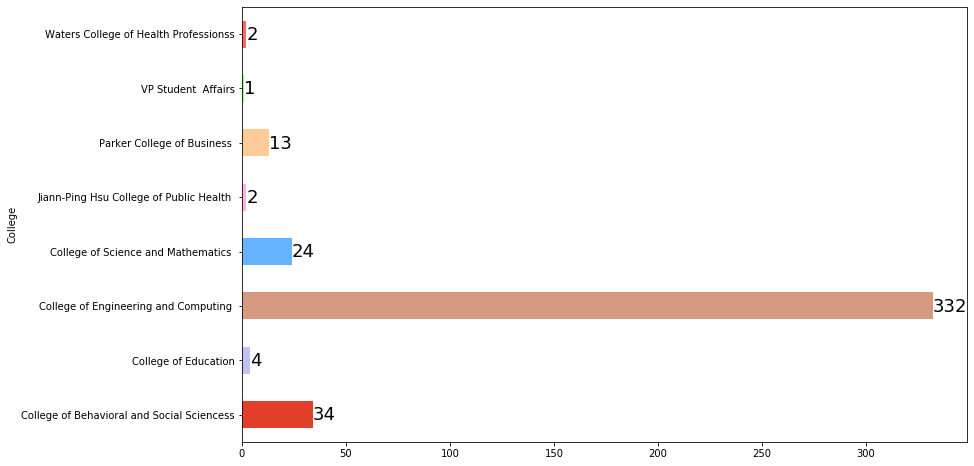

In [43]:
colors =  ["#E13F29", '#c2c2f0',"#D69A80", '#66b3ff', '#ffb3e6','#ffcc99','#99ff99','#ff6666',"#D63B59", 
           "#CB5C3B", "#EB8076", "#AE5552", "#96624E"]
new_index2 = ['Waters College of Health Professions', 'VP Student Affairs', 'Parker College of Business', 
              'Jiann-Ping Hsu College of Public Health', 'College of Science and Mathematics', 
              'College of Engineering and Computing', 'College of Education', 
              'College of Behavioral and Social Sciences', 'College of Arts and Humanities']
    

college_count19 = (data_fall19.groupby(['College']).size())

display(college_count19.to_frame())
clg_ = college_count19.plot.barh(color = colors, figsize=(13,8))
clg_.set_alpha(4.00)

totals = []

# find the values and append to list
for i in clg_.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = (sum(totals))

# set individual bar lables using above list
for i in clg_.patches:
    # get_width pulls left or right; get_y pushes up or down
    if i.get_width()>0:
        clg_.text(i.get_width()+0.15, i.get_y()+.15, \
            str(i.get_width()), fontsize=18, color='black', rotation=0)

